# PROJECT FINAL REPORT          --Peiyan Yu, Ziyi Huang

# 1  Introduction
# 1-1 Overall Objective:
To identify city services requests patterns of Washington DC in multiple perspectives, and to give advice on city service request fullfillment adjustment. 


# 1-2 Data Description:
## 1-2-1 Data source
We collected Washington DC City Service Requests datasets of ten years from Washington DC open data. 
## 1-2-2 We have mainly four aspects of attributes: 
1. location/district categories 
2. service categories and descriptions
3. responding departments and wards
4. request filing, handling date and time

## 1-2-3 Attributes
Attributes are the same for these ten years.Each dataframe has 30 attributes,which are:

['X', 'Y', 'OBJECTID', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'SERVICEREQUESTID', 'PRIORITY',
       'STREETADDRESS', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'CITY',
       'STATE', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'WARD', 'DETAILS']

## 1-2-4 Corresbonding data type and meaning:
- OBJECTID:'numpy.int64', unique ID;
- SERVICECODE:'str',service code of the request
- SERVICECODEDESCRIPTION:'str', service description in accordance with
- SERVICETYPECODEDESCRIPTION: 'str'
- ORGANIZATIONACRONYM: 'str'
- SERVICECALLCOUNT: 'numpy.int64'
- ADDDATE: 'str'
- RESOLUTIONDATE: 'str'
- SERVICEDUEDATE: 'str'
- SERVICEORDERDATE: 'str'
- INSPECTIONFLAG: 'str'
- INSPECTIONDATE: 'float'
- INSPECTORNAME: 'numpy.float64'
- SERVICEORDERSTATUS: 'str'
- STATUS_CODE: 'str'
- SERVICEREQUESTID: 'str'
- PRIORITY:  'str'
- STREETADDRESS: 'str'
- XCOORD: 'numpy.float64'
- YCOORD: 'numpy.float64'
- LATITUDE: 'numpy.float64'
- CITY: 'str'
- STATE: 'str'
- ZIPCODE: 'numpy.float64'
- MARADDRESSREPOSITORYID: 'numpy.float64'
- WARD: 'numpy.float64'
- DETAILS: 'float'

We'll be using data from 2018 as the primary dataset to analyze request feaures. 'data2018' set has 77776 rows and the same 30 attributes as above.OBJECTID is unique ID.

# 1-3 Analysis Stages:
## 1-3-1 First Stage: Data Preparation
### First stage General Goal
In the first phase, We have 3 goals:
- we aimed to clean dataframe into clean form ready to perform analysis and get preliminary analysis of 2018 dataframe.
- to merge relevant data from all ten datasets for future time series analysis.
- to raise specific questions and analysis directions of next phase.

## 1-3-2 Second Stage: Analysis 
### Second stage analysis perspectives
**Generall method**   
we started from general trend, discovered intersting findings and zoom in to those finds in different scope, disected the problems as we went on. 

**For our analysis of DC public service requests fullfillment process, we analyzed from 3 dimensions:**
- Time series perspectice
- Geographical perspective
- Request categories    

**With 2 major concerns:**
- Service Requests requencies
- Service Requests complete time  

**After our analysis, we'll be able to tell:**   
- Requests complete efficiencies regarding different wards and categories. Patterns of requests among wards and categories and their changes throughout the year. And to identify causes 
- Requests in different times of the year, month, week and day scope. And to identify causes.  

**And to make proposals in 2 aspects:**  
- long-term proposal: what service in what ward need to work on infrastucture and major improvement
- short-term proposal: On what time of year/ month/ day whould the department be noticed of emergencies and team dispatch

In [103]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [104]:
path='C:/Users/yupei/Desktop/Academics spring/758X Python/project/'

In [105]:
data2018=pd.read_csv(path+'City_Service_Requests_in_2018.csv')

# 2 Data Preparation

## 2-1 Description
### To get the data ready for analysis, here're the tasks:
1. Previewed 2018 dataset (shape, attributes, first few rows, column datatypes)
2. Preliminary missing values, abnormal values, duplicate rows handling 
   - checked overall missing values status and counts
   - deleted 2 columns which are not relevant and containing too many missing values
   - filled in missing values in with 0 for numeric columns containing missing values
   - checked abnormal location values using describe function and there's none
   - checked duplicate rows and there's none
3. Cleaned SERVICECODE, SERVICECODEDESCRIPTION, SERVICECODETYPEDESCRIPTION Columns
   - Constructed dictionary to store service code and corresbonding service description
   - deleted SERVICECODEDESCRIPTION, SERVICECODETYPEDESCRIPTION columns which are now redundant
4. Cleaned CITY, STATE and ZIPCODE columns
   - Examined values of CITY and STATE columns using unique method
   - Examined values of ZIPCODE column and checked the number of null values, compared with CITY and STATE columns
   - Converted ZIPCODE column from float to integer
   - Deleted 6 rows where ZIPCODE is null 
   - Deleted CITY and STATE columns
5. Cleaned Location relevant columns
   - Decided to use LATITUDE and LONGITUDE as location data
   - Deleted redundant columns (X,Y,XCOORD,YCOORD,street address)
6. Cleaned MARADDRESSREPOSITORYID,WARD Columns
   - Converted these two columns from float to int
   - Checked for abnormal values of WARD columns using unique method
7. Clean time series data for future use
   - Deleted duplicate column
   - Formatted date and time data into clean form
   - Cinstructed complete_time column to calculate complete time of filed requests
8. Deleted other irrelevant rows and renamed remaining columns

## 2-2 Data Preview
To learn the structure, number of rows, attributes of the dataframe

In [106]:
# Get attribute names
print('Attributes:',data2018.columns)
# Get dataframe shape
print('Dataframe Shape:',data2018.shape)
# Get column data types
column_meta=[]
for x in data2018.columns:
    column_meta.append((x,type(data2018[x][0])))

Attributes: Index(['X', 'Y', 'OBJECTID', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'SERVICEREQUESTID', 'PRIORITY',
       'STREETADDRESS', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'CITY',
       'STATE', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'WARD', 'DETAILS'],
      dtype='object')
Dataframe Shape: (77776, 30)


In [107]:
#Preview the dataframe
data2018.head(5)

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-76.970417,38.864444,307864,DMV01,DMV - Drivers License/ID Issues,Driver Vehicle Services,DMV,1,2018-01-03T10:14:32.000Z,2018-01-03T10:18:35.000Z,...,402567.660000,132957.830000,38.864436,-76.970414,WASHINGTON,DC,20020.0,301454.0,7.0,NaN
1,-77.021908,38.881287,307865,SIGTRAMA,Traffic Signal Issue,Toa- Trans Sys Mnt,DDOT,1,2018-01-03T09:40:35.000Z,2018-02-22T08:33:38.000Z,...,398099.299996,134827.418747,38.881280,-77.021906,NaN,NaN,20024.0,903906.0,6.0,Traffic signal service request closed to initi...
2,-77.018693,38.930343,307866,S0316,Recycling Cart Delivery,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03T10:17:13.000Z,2018-01-16T15:18:05.000Z,...,398379.390000,140272.930000,38.930336,-77.018691,WASHINGTON,DC,20010.0,229343.0,1.0,Closed after ten days no payment received
3,-77.003177,38.903739,307867,SRC02,Snow/Ice Removal,SNOW,DPW,1,2018-01-03T10:00:39.000Z,2018-01-08T15:34:03.000Z,...,399724.610000,137319.480000,38.903731,-77.003175,WASHINGTON,DC,20002.0,809549.0,6.0,NaN
4,-76.921593,38.901643,307868,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03T10:16:53.000Z,2018-01-12T07:28:01.000Z,...,406801.370000,137089.690000,38.901635,-76.921591,WASHINGTON,DC,20019.0,7877.0,7.0,sb - Collected – Close SR


## 2-3 Data Preparation Process

### 2-3-1 Preliminary missing values, abnormal values, duplicate rows handling

In [108]:
# Check if there're missing values
data2018.isnull().values.any()

True

In [109]:
# count null values in each column
data2018.isnull().sum()

X                                 0
Y                                 0
OBJECTID                          0
SERVICECODE                       0
SERVICECODEDESCRIPTION            0
SERVICETYPECODEDESCRIPTION        0
ORGANIZATIONACRONYM               0
SERVICECALLCOUNT                  0
ADDDATE                           0
RESOLUTIONDATE                11902
SERVICEDUEDATE                    3
SERVICEORDERDATE                  0
INSPECTIONFLAG                    0
INSPECTIONDATE                72169
INSPECTORNAME                 77776
SERVICEORDERSTATUS                0
STATUS_CODE                       0
SERVICEREQUESTID                  0
PRIORITY                          0
STREETADDRESS                  5888
XCOORD                            0
YCOORD                            0
LATITUDE                          0
LONGITUDE                         0
CITY                           5886
STATE                          5886
ZIPCODE                           6
MARADDRESSREPOSITORYID      

Since INSPECTIONDATE, INSPECTORNAME have over 70000 null values, these two columns should be deleted. Other null values would be dealt with when we get to specific column.

In [110]:
# Remove INSPECTIONDATE, INSPECTORNAME columns
data2018=data2018.drop('INSPECTIONDATE',axis=1)
data2018=data2018.drop('INSPECTORNAME',axis=1)

In [111]:
# Fill in 0 for WARD, MARADDRESSREPOSITORYID columns which are null
data2018.WARD = data2018.WARD.fillna(0)
data2018.MARADDRESSREPOSITORYID =data2018.MARADDRESSREPOSITORYID.fillna(0)

In [112]:
# Check for location abnoarmal values 
data2018.iloc[:,0:2].describe()

,X,Y
count,77776.000000,77776.000000
mean,-77.014328,38.911971
std,0.038531,0.030820
min,-77.114209,38.813547
25%,-77.038511,38.895054
50%,-77.018913,38.909796
75%,-76.989322,38.932253
max,-76.909760,38.995170


In [113]:
# Check for duplicate rows
len(data2018.OBJECTID.unique()) ==len(data2018)

True

The location data seem to be in reasonable range, and there's no duplicate rows.

### 2-3-2 Clean SERVICECODE, SERVICECODEDESCRIPTION, SERVICECODETYPEDESCRIPTION Columns
To get a dictionary of servicecode with corresbonding description and type. Then remove redundant information from dataframe.

In [114]:
# construct dictionary as dictionary of servicecode and servicecodedescription, servicecodetypedescription
grouped_servicecode_2018=data2018.groupby('SERVICECODE')

dict_servicecode=dict()
for name,group in grouped_servicecode_2018:
    dict_servicecode[name]=group['SERVICECODEDESCRIPTION'].unique(),group['SERVICETYPECODEDESCRIPTION'].unique()

In [115]:
# remove SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION columns in data2018
#data2018=data2018.drop('SERVICECODEDESCRIPTION',axis=1)
#data2018=data2018.drop('SERVICETYPECODEDESCRIPTION',axis=1)
#data2018.head()

### 2-3-3 Clean CITY, STATE and ZIPCODE data
To get accurate geological categories; Also to deal with null values.Also convert zipcode datatype to int from float.

In [116]:
#check information of CITY and STATE
print('State info:',data2018.STATE.unique())
print('City info:',data2018.CITY.unique())

# check null information of CITY AND STATE
print('State info where city is null',data2018.STATE[data2018.CITY.isnull()== True].unique())

# check null information of zipcode
print('ObjectID whose Zipcode is null:',data2018.OBJECTID[data2018.ZIPCODE.isnull()== True])

State info: ['DC' nan]
City info: ['WASHINGTON' nan]
State info where city is null [nan]
ObjectID whose Zipcode is null: 24163    334388
32901    348390
34615    350136
39640    357097
40197    357654
46409    365002
Name: OBJECTID, dtype: int64


All requests are from Washington DC or have null values. STATE status of rows which CITY status is null is all null. And only 6 rows have null value in ZIPCODE column. So we decided to drop CITY and STATE columns, and delete rows whose ZIPCODE is null.

In [117]:
# Drop CITY and STATE columns
data2018=data2018.drop('CITY',axis=1)
data2018=data2018.drop('STATE',axis=1)
# Delete rows with no zipcode
data2018=data2018[data2018['ZIPCODE'].isnull()!=True]

In [118]:
# Convert ZIPCODE datatype from float to int.
data2018.ZIPCODE=data2018.ZIPCODE.astype(int)

In [119]:
data2018[data2018.ZIPCODE==-1555]

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
45735,-77.025043,38.884481,364328,DMV66,DMV - Copy of Ticket,Adjudication Services,DMV,1,2018-02-27T08:13:08.000Z,2018-03-05T15:04:08.000Z,...,STANDARD,8401 MOUNTAIN,397827.44,135181.95,38.884473,-77.02504,-1555,291726.0,6.0,NaN


In [120]:
data2018=data2018.drop(45735)

### 2-3-4 Clean exact location information
We decided to use LATITUDE and LONGITUDE as excat location coordinates and remove the relative location coordinates columns XCOORD, YCOORD, X, Y, street address

In [121]:
data2018=data2018.drop('XCOORD',axis=1)
data2018=data2018.drop('YCOORD',axis=1)
data2018=data2018.drop('X',axis=1)
data2018=data2018.drop('Y',axis=1)
data2018=data2018.drop('STREETADDRESS',axis=1)

### 2-3-5 Clean MARADDRESSREPOSITORYID,WARD Columns
We've already fill null values with 0. Now we could convert datatype to int from float.

In [122]:
# Convert MARADDRESSREPOSITORYID,WARD Columns datatype to int
data2018.MARADDRESSREPOSITORYID=data2018.MARADDRESSREPOSITORYID.astype(int)
data2018.WARD=data2018.WARD.astype(int)

In [123]:
# Check for abnormal values
data2018.WARD.unique()

array([7, 6, 1, 2, 3, 5, 8, 4, 0], dtype=int64)

### 2-3-6 Clean datetime columns

In [124]:
# Remove duplicate column
data2018=data2018.drop('SERVICEORDERDATE',axis=1) 

In [125]:
# Transform 4 columns containing time series data to clean form
data2018['ADDDATE'] = pd.to_datetime(data2018['ADDDATE'], format='%Y-%m-%dT%H:%M:%S')
data2018['RESOLUTIONDATE'] = pd.to_datetime(data2018['RESOLUTIONDATE'], format='%Y-%m-%dT%H:%M:%S')
data2018['SERVICEDUEDATE'] = pd.to_datetime(data2018['SERVICEDUEDATE'], format='%Y-%m-%dT%H:%M:%S')

### 2-3-7 Remove other irrelevant columns and rename remaining columns

In [126]:
# Remove other irrelevant columns
data2018=data2018.drop('SERVICECALLCOUNT',axis=1)
data2018=data2018.drop('INSPECTIONFLAG',axis=1)
data2018=data2018.drop('STATUS_CODE',axis=1)

In [127]:
# Rename remaining columns
data2018.columns = ['object_id','service_code','service_description','service_category','organization_acronym','add_date','resolution_date','servicedue_date','service_status','service_request_id','priority','latitude','longitude','zipcode','address_repository_id','ward','details']

In [128]:
# reset index
data2018.set_index('add_date', inplace=True)

In [129]:
# construct complete time column
data2018['complete_time']=data2018['resolution_date']-data2018.index

In [130]:
df=data2018
df.head(5)

,object_id,service_code,service_description,service_category,organization_acronym,resolution_date,servicedue_date,service_status,service_request_id,priority,latitude,longitude,zipcode,address_repository_id,ward,details,complete_time
add_date,,,,,,,,,,,,,,,,,
2018-01-03 10:14:32,307864,DMV01,DMV - Drivers License/ID Issues,Driver Vehicle Services,DMV,2018-01-03 10:18:35,2018-01-04 10:14:00,CLOSED,18-00003552,STANDARD,38.864436,-76.970414,20020,301454,7,NaN,0 days 00:04:03
2018-01-03 09:40:35,307865,SIGTRAMA,Traffic Signal Issue,Toa- Trans Sys Mnt,DDOT,2018-02-22 08:33:38,2018-01-05 09:40:00,CLOSED,18-00003388,STANDARD,38.881280,-77.021906,20024,903906,6,Traffic signal service request closed to initi...,49 days 22:53:03
2018-01-03 10:17:13,307866,S0316,Recycling Cart Delivery,SWMA- Solid Waste Management Admistration,DPW,2018-01-16 15:18:05,2018-01-31 10:17:00,CLOSED,18-00003562,STANDARD,38.930336,-77.018691,20010,229343,1,Closed after ten days no payment received,13 days 05:00:52
2018-01-03 10:00:39,307867,SRC02,Snow/Ice Removal,SNOW,DPW,2018-01-08 15:34:03,2018-01-04 10:00:39,CLOSED,18-00003497,STANDARD,38.903731,-77.003175,20002,809549,6,NaN,5 days 05:33:24
2018-01-03 10:16:53,307868,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2018-01-12 07:28:01,2018-01-23 10:16:00,CLOSED,18-00003559,STANDARD,38.901635,-76.921591,20019,7877,7,sb - Collected – Close SR,8 days 21:11:08


Now, dataset is cleaded and well constructed for analysis.

# 3 Analysis 
#### For our analysis of DC public service requests fullfillment process, we analyzed from 3 dimensions:
- Time series perspectice
- Geographical perspective
- Request categories

#### After our analysis, we'll be able to tell:
- What category of service in what ward on which day should be noticed in case of emergencies. And what long-term infrastructure should be imrpoved in which ward for what service.
- How to dispatch service teams in different times of the year, month, week and day scope.

#### Which are two aspects of concerns:
- Service Requests requencies
- Service Requests complete time

So first, we analyzed requests complete time, to find out trend, patterns, peaks. So to find out what the causes of peaks and increase also decreasing causes.

# 3-1 Request Complete Time Analysis

In [131]:
#transform compelte_time from delta time to days 
df['complete_time']=[x.days for x in df['complete_time']]

## 3-1-1 Complete Time General Trend:
To get the knowledge of general trend of requests completion time, we plot out the average request complete time of each day in 2018

Text(0.5,0,'day of 2018')

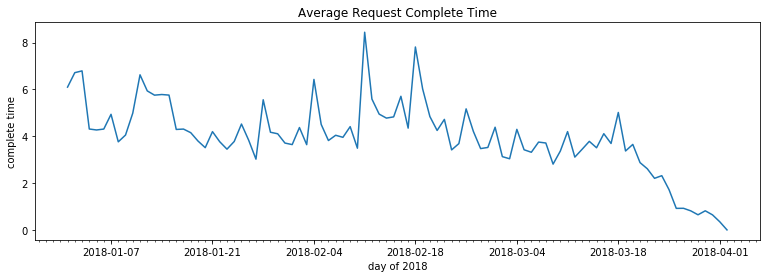

In [134]:
# Downsample count of request to daily measurements 
from matplotlib import dates
days = dates.DayLocator()

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(days)

ax.set_title('Average Request Complete Time')
ax.plot(df['complete_time'].resample('D').mean())
ax.set_ylabel('complete time')
ax.set_xlabel('day of 2018')

#plt.legend(('# of service'))
#plt.xticks(arange(130, step=1))  # 201 since you want 200 displayed in the grap

From this plot, We discovered two interesting things:
- After mid March of 2018, there's a significant drop of average request completion time
- There's a peak in early Feburary

We would want to know:
- What happend on the peak day
- What caused the significant drop of average request completion time

And also to find out what we could improve  for requests fullfillment in the future.

Therefore, we'll zoom in in the above two aspects.

## 3-1-2 What happened on request complete_time peak day?
First we want to know the distribution of complete time on this peak date.

In [436]:
# Find out what happened on the day when complete time peaked
y=df['complete_time'].resample('D').mean()
ymax = max(y)
xmax = y[y==ymax]
print(xmax,ymax)

add_date
2018-02-11    8.438596
Freq: D, Name: complete_time, dtype: float64 8.43859649123


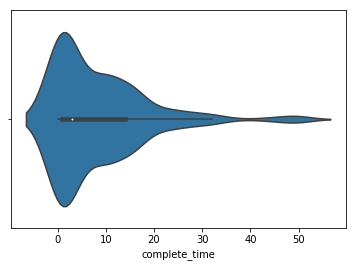

In [439]:
# Distribution of request complete time
sns.violinplot(df['2018-02-11'].complete_time)

We discovered that most of the cases are in the range of 0-20. And the requests with complete time over 40 days significantly increase the average.These requests are considered the causes of the peak. So let's take a closer look at them.

### Breakdown by complete time over 40 days

In [137]:
# preview
df[df.complete_time>40]['2018-02-11'].head(2)

,object_id,service_code,service_description,service_category,organization_acronym,resolution_date,servicedue_date,service_status,service_request_id,priority,latitude,longitude,zipcode,address_repository_id,ward,details,complete_time
add_date,,,,,,,,,,,,,,,,,
2018-02-11 12:07:15,346797,DDENIDTI,DOEE - Engine Idling Tips,Department of Energy and Environment,DOEE,2018-04-02 12:11:15,2018-02-26 18:00:00,CLOSED,18-00072990,STANDARD,38.887445,-76.983413,20003,300665,6,NaN,50.0
2018-02-11 13:28:14,346810,S0459,Tree Removal,Urban Forrestry,DDOT,2018-03-29 08:43:07,2018-10-23 17:00:00,CLOSED,18-00073032,STANDARD,38.882610,-76.962579,20019,40557,7,The remainder of the tree is now scheduled to ...,45.0


In [138]:
# breakdown by categories
df[df.complete_time>40]['service_description'].value_counts().head(10)

Graffiti Removal                          107
Pothole                                    29
Streetlight Repair Investigation           26
How Is My Driving - Complaint              22
Roadway Signs                              21
Tree Pruning                               14
Tree Planting                              12
Abandoned Vehicle - On Public Property     10
FEMS - Community Events                     8
Parking Meter Repair                        8
Name: service_description, dtype: int64

From the cetegories, we took out the most common ones, and plot their trend in the whole year, to find out what categories are anomalies on peak day.

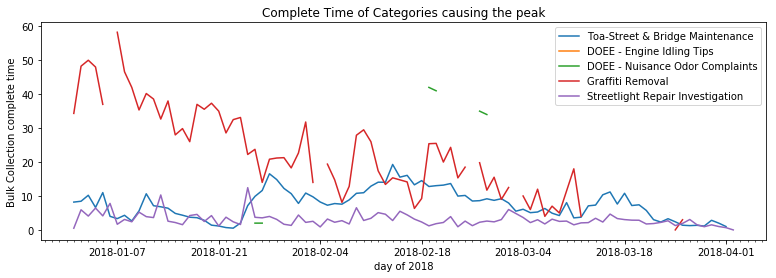

In [140]:
# Downsample count of request to daily measurements 
from matplotlib import dates
days = dates.DayLocator()

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(days)

ax.plot(df[df.service_category=='Toa-Street & Bridge Maintenance']['complete_time'].resample('D').mean())
ax.plot(df[df.service_description=='DOEE - Engine Idling Tips']['complete_time'].resample('D').mean())
ax.plot(df[df.service_description=='DOEE - Nuisance Odor Complaints']['complete_time'].resample('D').mean())
ax.plot(df[df.service_description=='Graffiti Removal']['complete_time'].resample('D').mean())
ax.plot(df[df.service_description=='Streetlight Repair Investigation']['complete_time'].resample('D').mean())
ax.set_ylabel('Bulk Collection complete time')
ax.set_xlabel('day of 2018')
ax.set_title('Complete Time of Categories causing the peak')
plt.legend(('Toa-Street & Bridge Maintenance', 'DOEE - Engine Idling Tips','DOEE - Nuisance Odor Complaints','Graffiti Removal','Streetlight Repair Investigation'))
           
#plt.xticks(arange(130, step=1))  # 201 since you want 200 displayed in the grap 

From this graph, we could discover that Street and Bridge maintainence was one of the major cause because it peaked around the peak day. And for other categories, though they took a long time to complete, but they're rather constant during the time of year. And there were probably a graffiti removal program that ended in 2018, March.

## 3-1-3 What caused the dramatic drop in complete time?
To analyze the drop, we took out the most frequet request categories because they took a major vote in avarage complete time.

### Break-down by service categories with most requests

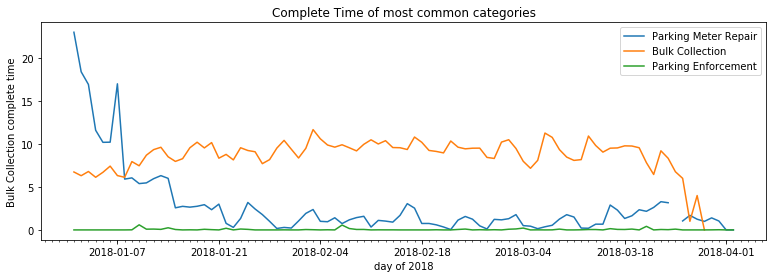

In [142]:
# Downsample count of request to daily measurements 
from matplotlib import dates
days = dates.DayLocator()

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(days)

ax.plot(df[df.service_description=='Parking Meter Repair']['complete_time'].resample('D').mean())
ax.plot(df[df.service_description=='Bulk Collection']['complete_time'].resample('D').mean())
ax.plot(df[df.service_description=='Parking Enforcement']['complete_time'].resample('D').mean())
ax.set_ylabel('Bulk Collection complete time')
ax.set_xlabel('day of 2018')
ax.set_title('Complete Time of most common categories')
plt.legend(('Parking Meter Repair', 'Bulk Collection','Parking Enforcement'))
           
#plt.legend(('# of service'))
#plt.xticks(arange(130, step=1))  # 201 since you want 200 displayed in the grap

From the requests which took longest to complete on 2018-02-11, we dicovered that they're mostly from Toa-Street & Bridge Maintenance and Department of Energy and Environment. After plotting these three categories throughout the year, we further identified that Engine idling tips seldom occurs, and nuisance oder complaints occured several times and Street & Bridge Maintenance requests are filed basically everyday. 
After plotting requests with more than complete time of 40 days, we dicovered the following trend:
- Graffitti took the longest time to complete a request. Over 2018, the efficiency improved significantly. There might have been a graffiti removal program which ended at late March.
- Street and Bridge maintainence mostly accounts for the peak of complete time on Febuary 11st for the request number. And the complete time of this category peaked in February and was flunctuating around the same level. And there's a slight drop from mid March
- Among the most filed requests category, bulk collection took the logest time. And its complete time dropped significantly after mid March.
- Parking meter requests dropped significantly from early January and remaind at a lpw level.

So we made the following proposal:
- Focus more on street and bridge maintenance efficiency as next step to improve request completion efficiency.
- Keep Parking meter repair system at the same service level.

# 3-2 About requests of different categories in different wards
Analyzed complete time found out the categories we should take special take, we want to locate the requests on wards to tell what different wards should notice what services.

## 3-2-1 Distribution of requests among categories

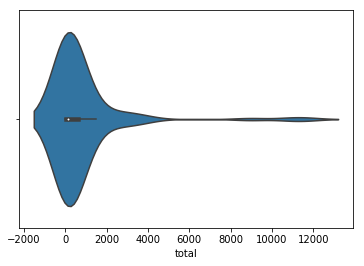

In [145]:
# pivot table of service categories and wards on counts
table_ward_service_cat=data2018.pivot_table(index='service_description', columns='ward', values='object_id', aggfunc='count', fill_value=0)
table_ward_service_cat['total']=table_ward_service_cat.sum(axis=1)

# Draw violin plot on service description to see the distribution
sns.violinplot(table_ward_service_cat['total'])

In [144]:
table_ward_service_cat.total.describe()

count      100.000000
mean       777.690000
std       1916.630064
min          1.000000
25%         22.750000
50%        115.000000
75%        618.000000
max      11683.000000
Name: total, dtype: float64

From the distribution, we discovered 6 categories that have way more requests than the other categories. First we analyze their distribution among wards.

## 3-2-2 Top categories among wards

In [472]:
table_ward_service_cat_top=table_ward_service_cat[table_ward_service_cat.total>3000]
# drop total column
table_ward_service_cat_top=table_ward_service_cat_top.drop('total',axis=1)

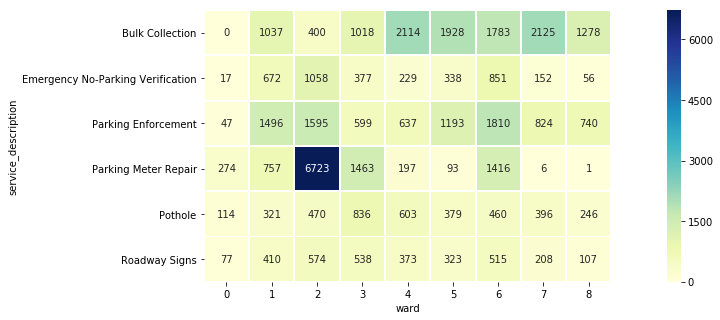

In [473]:
# Plot request frequncies in categories and wards
plt.figure(figsize=(20,5))
sns.heatmap(table_ward_service_cat_top, cmap='YlGnBu', annot=True, fmt='d', square=True, linewidths=1);

As in the heatmap, we discovered the following patterns:
- More than half of Parking Meter Repair requests are in ward 2, which is the downtown area
- There're equally large amount of bulk collection requests in ward 4 to 7, which is the north and east periferal of DC
- In ward 6, there're significant amount of parking enforcement,emergency no-parking verification and parking meter repair requests. These're all related with parking issues.
- Aside from bulk collection, most of the requests are related to parking.

We made the following proposals:
- Improve parking system in ward 6.
- Examine meter hardware and softeare systems in ward 2 to reduce parking meter malfunction.

## 3-2-3 Where does the reduction of bulk collection requests happend

In [552]:
#convert dataset to day-period
df1=data2018.to_period('D')

table_bulk_com=df1[df1.service_description=='Bulk Collection'].pivot_table(index='add_date', columns='ward', values='complete_time', aggfunc='mean', fill_value=0)
table_bulk_com=table_bulk_cat.loc['20180301':'20180329']

table_bulk_cat=df1[df1.service_description=='Bulk Collection'].pivot_table(index='add_date', columns='ward', values='object_id', aggfunc='count', fill_value=0)
table_bulk_cat=table_bulk_cat.loc['20180301':'20180329']

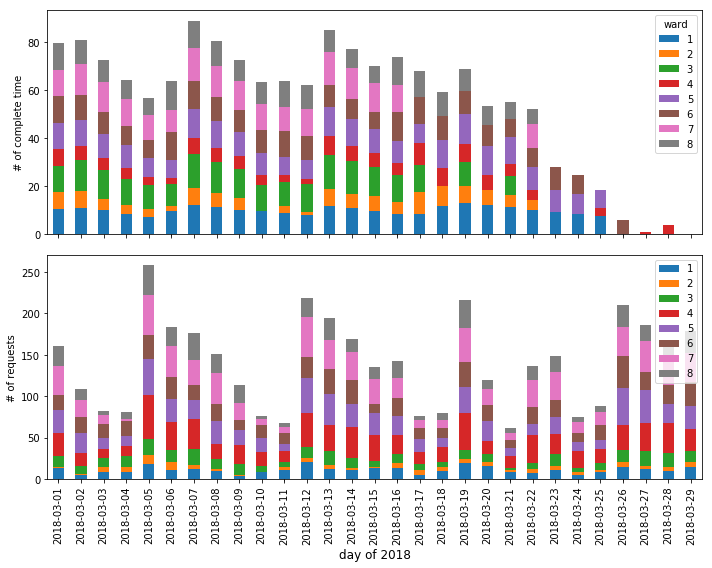

In [558]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,8))

table_bulk_com.plot(kind='bar', stacked=True,ax=ax[0])
plt.legend(loc='upper right')
plt.ylabel('# of complete time')
plt.xlabel('day of 2018')

table_bulk_cat.plot(kind='bar', stacked=True,ax=ax[1])
plt.legend(loc='upper right')
plt.ylabel('# of requests')
plt.xlabel('day of 2018')

# Adjust figure labels
ax[0].set_ylabel('# of complete time')
ax[1].set_ylabel('# of requests')
ax[1].set_xlabel('day of 2018', fontsize=12);

# Adjust subplot
plt.tight_layout()

Observed the huge reduction from 2018 mid March in bulk collection reuqests, we drew a bar chart to find out why and where this happend. And we found out:
- Bulk collection complete time in ward 7,8 and 2 significantly reduced while the number of daily requests remained the same.

So we'd examine the actions of above wards and propose to implement them in other wards.

## 3-2-4 Other categories among wards

In [392]:
# table_ward_service_cat=table_ward_service_cat.iloc[3:]
# filter out extremes
table_ward_service_cat=table_ward_service_cat[table_ward_service_cat.total>700]
table_ward_service_cat=table_ward_service_cat[table_ward_service_cat.total<3000]

# drop total column
table_ward_service_cat=table_ward_service_cat.drop('total',axis=1)
# transpose the table
table_ward_service_cat=table_ward_service_cat.transpose()

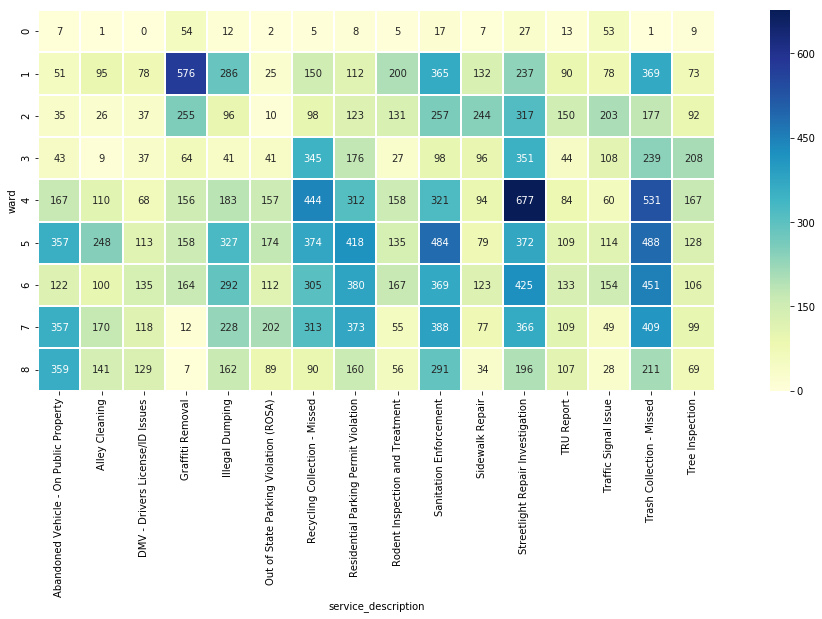

In [404]:
# Plot request frequncies in categories and wards
plt.figure(figsize=(20,7))
sns.heatmap(table_ward_service_cat, cmap='YlGnBu', annot=True, fmt='d', square=True, linewidths=1);

Plotted the rest categories, we discovered the following pattern:
- Streetlight Repair Investigation requests occurs the most in ward4.Graffiti removal requests occured the most in ward 1.

# 3-3 Time Series Analysis

Text(0.5,0,'day of 2018')

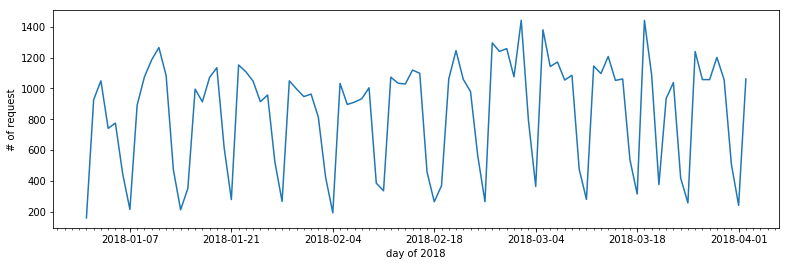

In [146]:
# Downsample count of request to daily measurements 
#df['service_code'].countplot(figsize=(8,4))
#plt.figure(figsize=(20,12))
#df['service_code'].resample('H').count().plot()
from matplotlib import dates

days = dates.DayLocator()

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(days)

ax.plot(df['service_code'].resample('D').count())
ax.set_ylabel('# of request')
ax.set_xlabel('day of 2018')

From the plot above we can see that the number of requests experienced periodly drop and rise. On weekdays, the number of total requests kept going up and reached highest point on Wednesday or Thursday. At the weekend, the requests decreased quickly and reached its lowest point on Sunday. There seems to be no obvious trend through time change. The reason for this pattern can be guessed that people come out to work or study more often on weekdays, and weekends some of them will choose to stay at home, so less requests will be made.

In this way, we count the number of requests in day unit. Now we want to take a close look at whether there are any patterns in a day. 

In [147]:
df2=df.loc['20180103 00':'20180203 00']

Text(0,0.5,'# of request')

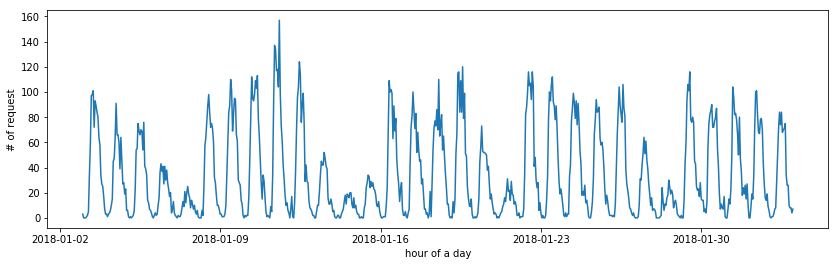

In [150]:
#requests by day

fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
#ax.xaxis.set_minor_locator(hours)

ax.plot(df2['service_code'].resample('H').count())
#ax.set_ylabel('# of request')
ax.set_xlabel('hour of a day')
ax.set_ylabel('# of request')

From the plot of one month we can see that there seems to be a pattern in each day, so we decide to choose to zoom in to one week and find what exactly it is.

Text(0,0.5,'# of request')

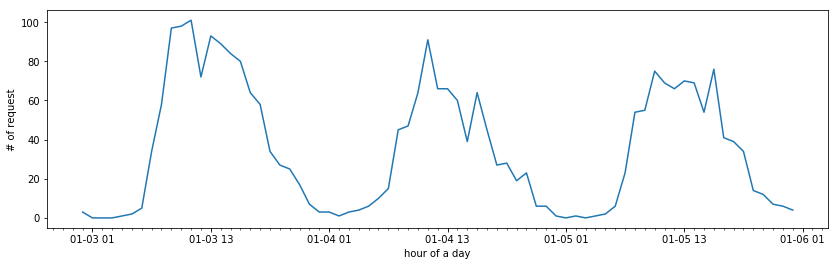

In [151]:
df3=df.loc['20180103 00':'20180106 00']

hours = dates.HourLocator()

fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(hours)


ax.plot(df3['service_code'].resample('H').count())
#ax.set_ylabel('# of request')
ax.set_xlabel('hour of a day')
ax.set_ylabel('# of request')

We can see that the peak time is two or three hour before 13:00, which is the also the busy time for people's daily life.Number of requests goes down after that, and reaches lowest point at 01:00 am, when everyone is tend to stay at home sleeping. The trend is obvious though there are some variations on each day.

Now we want to find the peak point 

In [485]:
y=df['service_code'].resample('D').count()
ymax = max(y)
xmax = y[y==ymax]
print(xmax,ymax)

add_date
2018-03-02    1442
Freq: D, Name: service_code, dtype: int64 1442


In [487]:
ymax_2=max(y[y<ymax])
xmax_2=y[y==ymax_2]
print(xmax_2,ymax_2)

add_date
2018-03-19    1441
Freq: D, Name: service_code, dtype: int64 1441


In [152]:
df5=df.loc['20180302 00':'20180303 00']

Text(0,0.5,'# of request')

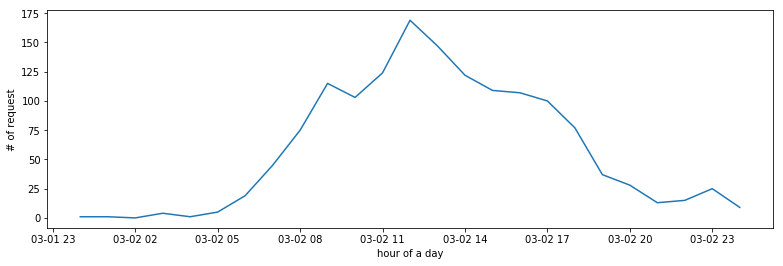

In [155]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
#ax.xaxis.set_minor_locator(hours)

ax.plot(df5['service_code'].resample('H').count())
#ax.set_ylabel('# of request')
ax.set_xlabel('hour of a day')
ax.set_ylabel('# of request')

In [489]:
y=df['service_code'].resample('D').count()
ymax = max(y)
xmax = y[y==ymax]
print(xmax,ymax)

add_date
2018-03-02    1442
Freq: D, Name: service_code, dtype: int64 1442


In [158]:
df5['service_code'].value_counts().head(5)

S0459       223
S0457       213
SIGNMISS    118
S0031       109
S0261       101
Name: service_code, dtype: int64

We can see that on this special day, the top three kinds of service was not what we usually saw. Tree Removal, Tree Inspection and Roadway Signs became the main concern on this day. 

What happened on that day? Here is a news "A mighty wind: Behind one of Washington’s worst-ever winter wind storms"
https://www.washingtonpost.com/news/capital-weather-gang/wp/2018/03/05/a-mighty-wind-behind-one-of-washingtons-worst-ever-winter-wind-storms-on-march-2/?noredirect=on&utm_term=.6e66f515c812

The wind storm of March 2, 2018, will go down as one of the landmark wintertime wind events in the Washington-Baltimore region. At its height, around 4 p.m. on Friday, there were more than half a million customers without power in the immediate D.C. region. The storm unleashed a relentless hammering on trees, homes, power lines and the frayed psyche of Washingtonians for a very long 18-to-24 hours.

In [161]:
df6=df.loc['20180319 00':'20180320 00']
df6['service_code'].value_counts().head(5)

S0031       216
S0276       159
S0261       145
SIGNMISS     87
S0011        84
Name: service_code, dtype: int64

Text(0,0.5,'# of request')

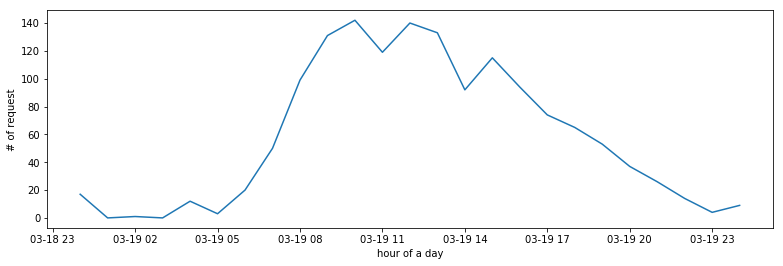

In [162]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
#ax.xaxis.set_minor_locator(hours)

ax.plot(df6['service_code'].resample('H').count())
#ax.set_ylabel('# of request')
ax.set_xlabel('hour of a day')
ax.set_ylabel('# of request')

From the table and plot we can find that the regular categories went up (Bulk Collection, Parking Meter Repair and  Parking Enforcement). We look at the calender and find that it may because of the spring break. People were travelling at that time and more people came to visit wahsington DC. So the daily task would be requested more often. 

# 4 Conclusion

## 4-1 Interesting findings:
### 4-1-1 Complete time:
**What happend on peak day?**  
Street and Bridge maintainence mostly accounts for the peak of complete time on Febuary 11st. And the complete time of this category peaked in February and was flunctuating around the same level. And there's a slight drop from mid March

**What caused the dramatic drop in 2018 March?**  
Among the most filed requests category, bulk collection took the logest time. And its complete time dropped significantly after mid Marcc, which is the cause of the overall complete time drop. Also,Parking meter requests dropped significantly from early January and remaind at a low level.

**Other efficient program:**  
Graffitti took the longest time to complete a request. Over 2018, the efficiency improved significantly. There were a graffiti removal program which ended at late March.

### 4-1-2 Requests of different categories in different wards: 
**Breaked down, which ward took the most frequent requests:**  
More than half of Parking Meter Repair requests are in ward 2, which is the downtown area

**What're the most frequent categories and what about them?**  
Bulk collection requests were filed the most. And aside from it, most of the requests are related to parking.  
In ward 6, there're significant amount of parking enforcement,emergency no-parking verification and parking meter repair requests.There're equally large amount of bulk collection requests in ward 4 to 7, which is the north and east periferal of D.  
Bulk collection complete time in ward 7,8 and 2 significantly reduced while the number of daily requests remained the same.

### 4-1-3 Requests frequecies in different time scope
- the number of requests experienced periodly drop and rise. On weekdays, the number of total requests kept going up and reached highest point on Wednesday or Thursday. At the weekend, the requests decreased quickly and reached its lowest point on Sunday.
- the peak time is two or three hour before 13:00, which is the also the busy time for people's daily life.Number of requests goes down after that, and reaches lowest point at 01:00 am, when everyone is tend to stay at home sleeping. The trend is obvious though there are some variations on each day.
- We can see that on this special day, the top three kinds of service was not what we usually saw. Tree Removal, Tree Inspection and Roadway Signs became the main concern on this day.

## 4-2 Proposal to DC Cisty Services

### Long Term:
- Regarding complete time and number of requests, we suggest DC servie ward 6 to examine and improve parking hardward and software systems.
- Regarding the most frequent service reuested Bulk Collection, we suggest implement improving methods applied by ward 2,7,8 to ward 1,5 and 6.

### Emergency Handling:
- Regarding services that took long,be prepared in February.
- Be prepared on Wensdays and Thursdays.